In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'og_3'
]

## Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

### 30T

In [4]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.075, 0.117) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.192, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

In [5]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('og_3_30T', 30, True)

Iter 1 , Loss = 0.9390819748395337 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9140436113776174 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8849456856503523 , Noise = 0.5982578992843628
Iter 4 , Loss = 0.8591474199140082 , Noise = 0.5544907450675964
Iter 5 , Loss = 0.834357430231258 , Noise = 0.5131877064704895
Iter 6 , Loss = 0.8090745570154897 , Noise = 0.47433316707611084
Iter 7 , Loss = 0.7849470464491127 , Noise = 0.43788936734199524
Iter 8 , Loss = 0.7628506695019858 , Noise = 0.4038158059120178
Iter 9 , Loss = 0.7422626481626308 , Noise = 0.37207451462745667
Iter 10 , Loss = 0.7225352528219621 , Noise = 0.3426205515861511
Iter 11 , Loss = 0.7037976648073844 , Noise = 0.3153943121433258
Iter 12 , Loss = 0.6867554000853611 , Noise = 0.2903248965740204
Iter 13 , Loss = 0.6719610083084923 , Noise = 0.26733964681625366
Iter 14 , Loss = 0.6586816630613127 , Noise = 0.2463703155517578
Iter 15 , Loss = 0.6464695003472861 , Noise = 0.2273443192243576
Iter 16 , Loss = 0.636656919970

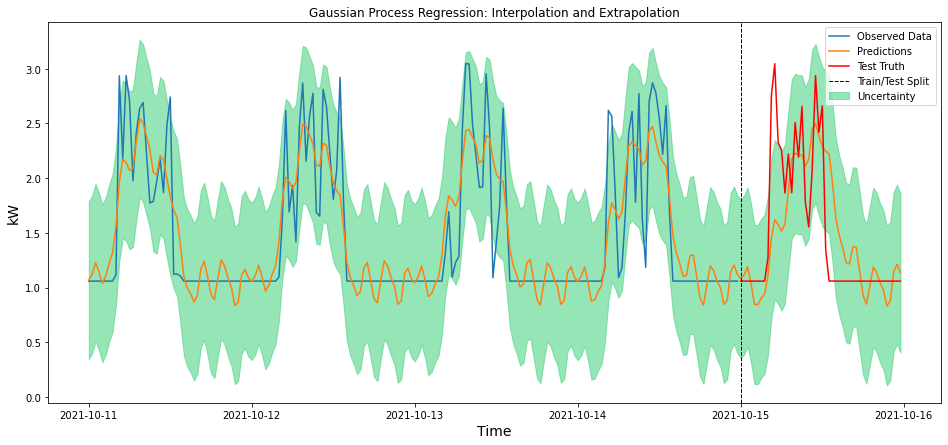

tensor(35.4969, dtype=torch.float64)


In [8]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='og_3',
    update_score=False
)   

In [10]:
mse, mape

(0.5489320456034551, 0.8472576159536728)